In [49]:
from splinter import Browser
from bs4 import BeautifulSoup 
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import requests
import pymongo
import matplotlib.pyplot as plt

In [50]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [51]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

In [52]:
html = browser.html
soup = BeautifulSoup(html, "html.parser")

In [53]:
facts_pd = pd.read_html(url)
facts_df = pd.DataFrame(facts_pd[0])
facts_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [54]:
facts_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [55]:
month=facts_df['month'].value_counts()
month

4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: month, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

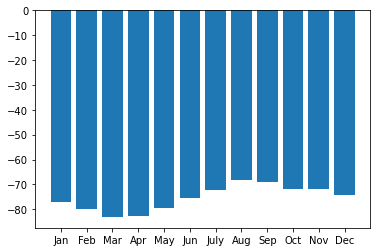

In [61]:
month_temp = facts_df.groupby('month')
lowest_temperature= month_temp['min_temp'].mean()
lowest_temperature
N=12
ind=np.arange(N)
bar1=plt.bar(ind,lowest_temperature)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'July', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

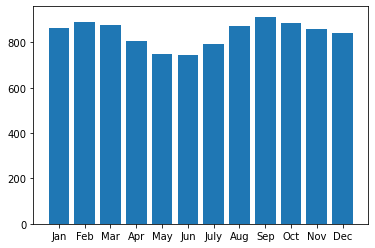

In [63]:
lowest_pressure= month_temp['pressure'].mean()
lowest_pressure
bar1=plt.bar(ind,lowest_pressure)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'July', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
plt.show

In [ ]:
df = pd.read_html(url)[0]
print(df)
df.to_csv("data.csv")